In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
#import plotly.graph_objs as go
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline

In [3]:
# Import data and create df

data = pd.read_csv("/Users/Stacy/Documents/WebDevelopment/projects/sexualAssault_datasets/2010-2018_sexcrimes_violentcrimes.csv", index_col="CAD Event Number")
data = pd.DataFrame(data)
data.head()

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [4]:
# Rename columns to be pythonic

data.columns = ['event_clearing', 'call_type', 'priority', 
                'initial_call_type', 'final_call_type', 'original_time_queued',
               'arrived_time', 'precinct', 'sector', 'beat']

In [5]:
data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


## To Do
**Cleaning:**
* Clean out extra precinct values (one is 'unknown')
* Review if I need to delete rows with null sector value
* ~~Look at high number of lewd conduct calls with bad arrival dates (approx 50% of bad dates)~~
* ~~Delete cancelled_calls rows~~

**Calculations:**
* ~~Add col for delta between time queued and time arrived.~~

### Remove cxl's calls

In [6]:
# ID all clearing codes
clearing_codes = data['event_clearing'].unique().tolist()

# ID all calls cancelled by dispatch
cancelled_calls = data[data.event_clearing.str.contains("CANCELLED")]
cancelled_calls.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000014912,DUPLICATED OR CANCELLED BY RADIO,911,3,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,01/14/2010 02:52:44 AM,Jan 14 2010 04:36:09:000AM,EAST,EDWARD,E3
2010000026561,RESPONDING UNIT(S) CANCELLED BY RADIO,911,3,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,01/23/2010 08:16:53 PM,Jan 1 1900 12:00:00:000AM,SOUTH,SAM,S1
2010000047381,RESPONDING UNIT(S) CANCELLED BY RADIO,ONVIEW,9,-ASSIGNED DUTY - IN-SERVICE TRAINING,--RAPE - UNKNOWN SUSPECT (STRANGER),02/10/2010 07:41:21 PM,Feb 10 2010 07:41:21:000PM,WEST,DAVID,D2
2010000090603,RESPONDING UNIT(S) CANCELLED BY RADIO,911,3,FOLLOW UP,--ROBBERY - ARMED,03/19/2010 12:13:12 PM,Mar 19 2010 12:17:12:000PM,NORTH,UNION,U2
2010000121164,RESPONDING UNIT(S) CANCELLED BY RADIO,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,04/14/2010 02:20:13 PM,Apr 14 2010 02:26:17:000PM,NORTH,JOHN,J1


In [7]:
# Delete rows with cxl'd calls

data = data[data.event_clearing != 'RESPONDING UNIT(S) CANCELLED BY RADIO']
data = data[data.event_clearing != 'DUPLICATED OR CANCELLED BY RADIO']

data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [8]:
# Verify all cxl'd calls removed from DataFram

data[data.event_clearing.str.contains("CANCELLED")]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,


In [9]:
# Change original_time_queued to datetime
data['original_time_queued'] = pd.to_datetime(data.original_time_queued)

# Change arrived_time to datetime
data['arrived_time'] = pd.to_datetime(data.arrived_time, format='%b %d %Y %I:%M:%S:%f%p')

# Add time delta between original_time_queued and arrived_time
data['time_delta'] = (data.arrived_time - data.original_time_queued)/np.timedelta64(1, 's')

In [10]:
# Add columns for arrived year and month

data['year'] = data.arrived_time.dt.year
data['month'] = data.arrived_time.dt.month
data.head()

# data.dtypes

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80.0,2010,2
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,105.0,2010,1
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161.0,2010,1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680.0,2010,1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389.0,2010,1


In [11]:
# Counts by year 
# General trend: increase in CFS's

data.year.value_counts()

2018    2735
2016    2568
2017    2495
2015    2433
2014    2123
2013    2123
2012    2118
2011    2083
2010    1980
1900     446
Name: year, dtype: int64

In [12]:
# For rows with bad arrived time: change month and year to original_time_queued
# Where arrive_time year = 1900, change data.year and data.month to original_time_queued year

mask = data.year < 1901
column_name_year = 'year'
column_name_month = 'month'
data.loc[mask, column_name_year] = data.original_time_queued.dt.year
data.loc[mask, column_name_month] = data.original_time_queued.dt.month


data.year.value_counts()

2018    2827
2016    2624
2017    2543
2015    2491
2014    2170
2012    2162
2013    2159
2011    2118
2010    2010
Name: year, dtype: int64

### Identify bad arrival dates - not important to keep

In [13]:
# Isolate rows with bad arrival date
# There are no rows with original_time_queued dates are not between 2010-2018
ts = pd.to_datetime('12/12/2009')

bad_date_arrived = data.loc[data.arrived_time <= ts, :]
bad_date_arrived.final_call_type.count()

446

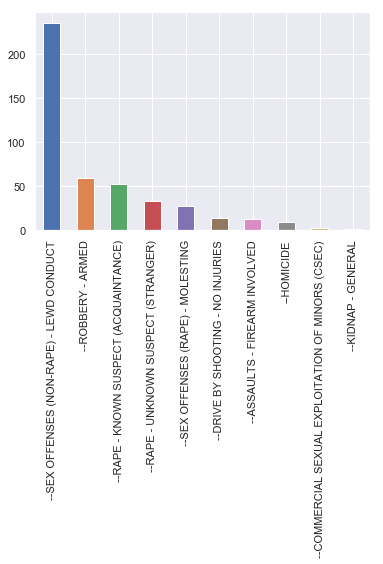

In [14]:
# Show count of final_call_type with bad dates

pd.value_counts(bad_date_arrived['final_call_type']).plot.bar()

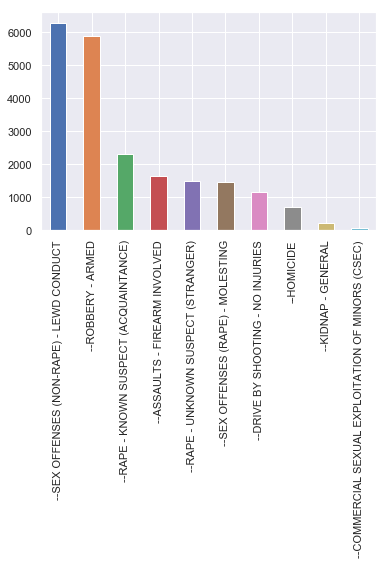

In [15]:
# Show final_call_type counts

pd.value_counts(data['final_call_type']).plot.bar()

In [16]:
# Views all rows that contain any null value

data[pd.isnull(data).any(axis=1)].head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1.740000e+03,2010,1
2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV,-3.471775e+09,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000029844,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-26 19:48:36,2010-01-26 20:21:48,UNKNOWN,NaN,S,1.992000e+03,2010,1


### Clean bad location values

In [17]:
# List precinct values

precinct = data['precinct'].unique().tolist()
precinct

['NORTH', 'SOUTH', 'EAST', 'SOUTHWEST', 'WEST', 'UNKNOWN']

In [18]:
# View all rows where precinct contains "UNKNOWN"

data[data.precinct.str.contains("UNKNOWN")].head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1.740000e+03,2010,1
2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV,-3.471775e+09,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000029844,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-26 19:48:36,2010-01-26 20:21:48,UNKNOWN,NaN,S,1.992000e+03,2010,1


In [19]:
# View all rows where sector contains "nan"

data[data.sector.isnull()].head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1.740000e+03,2010,1
2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV,-3.471775e+09,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000029844,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-26 19:48:36,2010-01-26 20:21:48,UNKNOWN,NaN,S,1.992000e+03,2010,1


## Which rows to keep/delete based on beat value
### TBD Beats
* LAPT --> all onviews, 8 CFS, all arrived time same as queue time
* INV --> Might involve calls started in other jurisdictions or handed off to other jurisdictions (ie: carjacking to WSP, armed robbery to FedWay)
* CTY--> 25 CFS, nearly all onviews, with all but 1 arrive time equals queue time
* CDD --> 28 CFS, most onview or non-911 phone, most onview or non-911 phone
* COMM --> 23 CFS, most are TRU initial call types, 
* WP --> 1 CFS, nothing unusual
* FS --> 2 CFS, 1 onview, 1 non-911 that took 7 hours for arrival time, both rapes
* WD --> 1 CFS, nothing unusual
* NS --> 1 CFS, 1900 arrival_time but cc is report
* MS --> 2 CFS, 1 onview, 1 non-911, 2 rpts
* SD --> 1 CFS, p1 non-911
* SPVDD --> 1 CFS, p3 rape w/ report
* ES --> 1 CFS, poss sub-station type walk-in
* CS --> 1 CFS, onview
* OS --> 3 CFS, all onviews, all armed robbery
* DET --> 69 CFS, appears to be detectives, vast majority onviews (keep for now... f/up arrests)

### Delete Beats
* CMD --> 1 CFS, was a stakeout
* WS --> 2 CFS, both non-911 phone, one was an agency assist
* US --> 2 CFS, both onview, one warrant pickup, one out to station
* CC --> 1 CFS, was broadcast 
* SWT --> 1 CFS, search warrant
* NP --> 2 CFS, 1 was search warrant, 1 f/up w arrest
* RS --> 1 CFS a direct-patrol w/ CC problem solving pjt
* SS --> 1 CFS, looks like an agency assist type call, no arrived time

### Keep Beats
* TQ --> 4 CFS, initial call type"TRU"

### Clean up beats

In [20]:
# Don't delete beats until I find out what the above beat acronyms mean
# Sandbox for viewing rows associated with different beat ids

data[data.beat.str.contains("WS")]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2011000040306,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2011-02-03 10:45:08,1900-01-01 00:00:00,UNKNOWN,NaN,WS,-3.505719e+09,2011,2
2013000460253,FOLLOW-UP REPORT MADE,"TELEPHONE OTHER, NOT 911",2,ASSIST OTHER AGENCY - ROUTINE SERVICE,--ROBBERY - ARMED,2013-12-26 17:58:56,2013-12-26 18:22:21,UNKNOWN,NaN,WS,1.405000e+03,2013,12


In [21]:
# Sector values

sector = data['sector'].unique().tolist()
sector

['UNION',
 'ROBERT',
 'GEORGE',
 'FRANK',
 'SAM',
 'DAVID',
 'EDWARD',
 'BOY',
 nan,
 'MARY',
 'NORA',
 'LINCOLN',
 'JOHN',
 'KING',
 'CHARLIE',
 'QUEEN',
 'WILLIAM',
 'OCEAN']

In [22]:
# View all rows where beat contains a non-beat id

# non_beat_ids = 'SS|99|INV|LAPT|S|DET|CMD|CTY|N|CS|CDD|E|WS|US|CC|W|TQ|OS|SWT|NP|COMM|WP|FS|WD|NS|MS|SD|RS|SS|SPVDD|ES'
non_beat_ids = 'SS|99|INV|LAPT|DET|CMD|CTY|CS|CDD|WS|US|CC|TQ|OS|SWT|NP|COMM|WP|FS|WD|NS|MS|SD|RS|SS|SPVDD|ES'


data[data.beat.str.contains(non_beat_ids)].head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1.740000e+03,2010,1
2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV,-3.471775e+09,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.000000e+00,2010,1
2010000032182,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2010-01-28 17:26:27,2010-01-28 17:26:27,UNKNOWN,NaN,DET,0.000000e+00,2010,1


In [23]:
# View list of beats

beat = data['beat'].unique().tolist()
# beat

## ID sexual assault terms

In [24]:
# Define terms that id sex-based crimes

sexual_assault_terms = 'CSEC|LEWD|MOLESTING|STRANGER|ACQUAINTANCE'
sexual_assault_terms

'CSEC|LEWD|MOLESTING|STRANGER|ACQUAINTANCE'

In [25]:
# Define terms that id rape CFS

rape_terms = 'STRANGER|ACQUAINTANCE'
rape_terms

'STRANGER|ACQUAINTANCE'

In [26]:
# Define terms that id non-sexual-assault violent crimes CFS


violent_crime_terms = 'KIDNAP|HOMICIDE|SHOOTING|ASSAULTS|ROBBERY'
violent_crime_terms

'KIDNAP|HOMICIDE|SHOOTING|ASSAULTS|ROBBERY'

In [27]:
# Define top event_clearing codes

event_clearing_codes = 'PHYSICAL ARREST MADE|ASSISTANCE RENDERED|REPORT WRITTEN|FOLLOW-UP REPORT MADE|UNABLE TO LOCATE'
event_clearing_codes

'PHYSICAL ARREST MADE|ASSISTANCE RENDERED|REPORT WRITTEN|FOLLOW-UP REPORT MADE|UNABLE TO LOCATE'

## Masks + Staging

In [63]:
# Create masks + stages for all rape call types, non-sex-related violent crimes, and clearing codes

is_sexual_assault_mask = data['final_call_type'].str.contains(sexual_assault_terms)
is_rape_mask = data['final_call_type'].str.contains(rape_terms)
is_tru_rape_mask = data['final_call_type'].str.contains(rape_terms) & data['initial_call_type'].str.contains("TRU ")
is_stranger_rape = data['final_call_type'].str.contains("STRANGER")
is_acquaintance_rape = data['final_call_type'].str.contains("ACQUAINTANCE")
is_lewd_conduct = data['final_call_type'].str.contains("LEWD")
is_violent_crime = data['final_call_type'].str.contains(violent_crime_terms)
is_top_clearing_code = data['event_clearing'].str.contains(event_clearing_codes)
is_arrest = data['event_clearing'].str.contains("PHYSICAL ARREST MADE")
is_report_written = data['event_clearing'].str.contains("REPORT")
is_priority3 = data[data.priority == 3]

stage_is_sexual_assault = data[is_sexual_assault_mask]
stage_is_rape_cfs = data[is_rape_mask]
stage_is_acquaintance_rape = data[is_acquaintance_rape]
stage_is_stranger_rape = data[is_stranger_rape]
stage_is_lewd_conduct = data[is_lewd_conduct]
stage_is_tru_rape_call = data[is_tru_rape_mask]
stage_is_violent_crime = data[is_violent_crime]
stage_is_top_clearing_code = data[is_top_clearing_code]

stage_top_cc_rape = data[is_rape_mask & is_top_clearing_code]
stage_top_cc_violent_crimes = data[is_violent_crime & is_top_clearing_code]
stage_is_rape_arrest = data[is_rape_mask & is_arrest]
stage_is_rape_report = data[is_rape_mask & is_report_written]
stage_is_violent_crime_arrest = data[is_violent_crime & is_arrest]
stage_is_violent_crime_report = data[is_violent_crime & is_report_written]

# make p3 stage?

stage_is_sexual_assault.head()
# stage_is_stranger_rape_cfs.head()
# stage_is_rape_cfs.head()
# stage_is_acquaintance_rape.head()
#stage_is_tru_rape_call.head(10)
#stage_is_violent_crime.head()
#stage_is_top_clearing_code.head(10)
#stage_top_cc_rape.head()
#stage_top_cc_violent_crimes.head()
# stage_is_rape_arrest.head()
# stage_is_rape_report.head()
# stage_is_violent_crime_arrest.head()
stage_is_violent_crime_report.head()


#value_counts(stage_is_report.event_clearing)

# Get the years


,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161.0,2010,1
2010000000989,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-01 20:17:12,2010-01-01 20:17:12,SOUTH,SAM,S1,0.0,2010,1
2010000001058,FOLLOW-UP REPORT MADE,ONVIEW,2,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--ROBBERY - ARMED,2010-01-01 21:43:41,2010-01-01 21:43:41,SOUTH,SAM,S3,0.0,2010,1
2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99,1740.0,2010,1
2010000003233,REPORT WRITTEN (NO ARREST),911,1,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-03 22:40:46,2010-01-03 22:43:04,NORTH,BOY,B2,138.0,2010,1


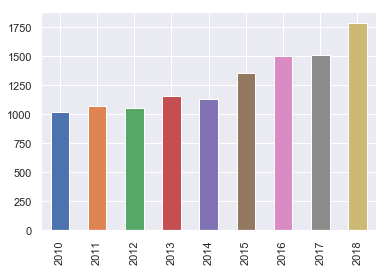

In [29]:
# Sandbox for each sexual assault by year


# All sexual assaults by year (upwards trend)
pd.value_counts(stage_is_sexual_assault.year).reindex([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]).plot.bar()

# All sexual assaults by month of year
# pd.value_counts(stage_is_sexual_assault.month).plot.bar()

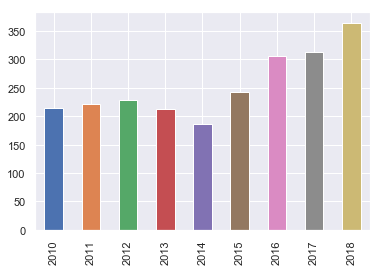

In [30]:
# Sandbox for rapes by year


# All rapes by year
# pd.value_counts(stage_rape_cfs.year).plot.bar()

# All stranger rapes by year
# pd.value_counts(stage_is_stranger_rape.year).plot.bar()

# All acquaintance rapes by year
pd.value_counts(stage_is_acquaintance_rape.year).reindex([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]).plot.bar()



# All rapes by month of year
# pd.value_counts(stage_rape_cfs.month).plot.bar()


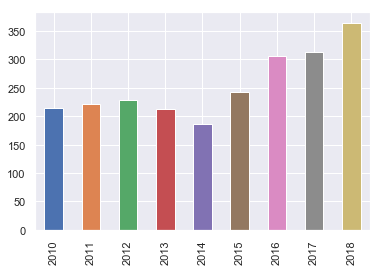

In [31]:
# Sandbox for stacked bar chart exploring all rapes

pd.value_counts(stage_is_acquaintance_rape.year).reindex([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]).plot.bar(stacked=True)


## TRU Sandbox

**More Information about TRU**

Cynthia Granard on LinkedIn: https://www.linkedin.com/in/cynthia-granard-2198b085/
She was TRU sgt in 2001-2003 (and also dispatch sgt at same time)> Connected w/ Cleo

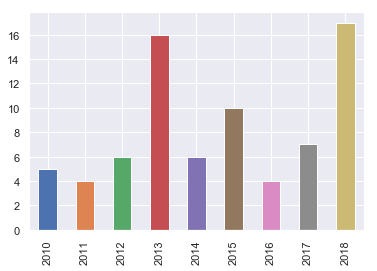

In [32]:
# Chart showing rape calls handled by TRU

pd.value_counts(stage_is_tru_rape_call.year).reindex([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]).plot.bar(stacked=True)

In [33]:
# Trying to get at comparison of non-I/P violent crimes vs sexual-assaults that were reffered to TRU
# Show details of CFS for ASSAULTS - FIREARM 




In [35]:
# Explore TRU call

# Save rows where initial call type is TRU

TRU = data[data.initial_call_type.str.contains("TRU ")]
TRU.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000071969,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--SEX OFFENSES (RAPE) - MOLESTING,2010-03-04 08:01:18,2010-03-04 08:06:03,NORTH,LINCOLN,L1,285.0,2010,3
2010000135469,RADIO BROADCAST AND CLEAR,"TELEPHONE OTHER, NOT 911",5,TRU - RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-04-26 10:00:35,2010-04-26 10:33:27,NORTH,NORA,N3,1972.0,2010,4
2010000187117,RADIO BROADCAST AND CLEAR,"TELEPHONE OTHER, NOT 911",5,TRU - ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--RAPE - UNKNOWN SUSPECT (STRANGER),2010-06-04 14:15:48,2010-06-04 15:05:24,WEST,QUEEN,Q3,2976.0,2010,6
2010000193566,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-06-09 08:28:18,2010-06-09 09:11:39,EAST,CHARLIE,C1,2601.0,2010,6
2010000202375,ASSISTANCE RENDERED,911,5,TRU - LEWD CONDUCT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-06-15 15:23:41,2010-06-15 15:25:17,NORTH,JOHN,J3,96.0,2010,6


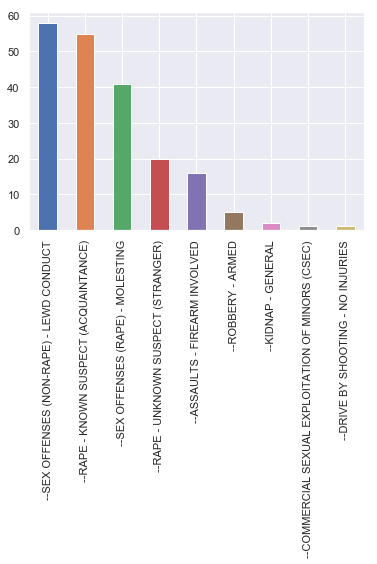

In [36]:
# Visualize counts of calls that started at TRUs

pd.value_counts(TRU.final_call_type).plot.bar()

**Question:**
Do any of the below with RR, get referred to detectives?

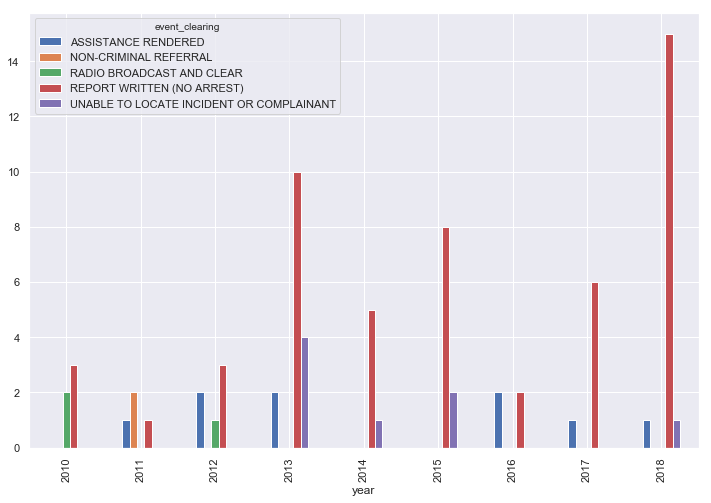

In [37]:
# Chart how TRU rape calls were resolved

# All TRU rape calls' resolution, years 2010-2018
#pd.value_counts(stage_is_tru_rape_call.event_clearing).plot.bar(stacked=True)

# All TRU rape calls' resolution, grouped by year
stage_is_tru_rape_call.groupby('event_clearing').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(12,8))



In [ ]:
# 2018 Q1 All calls with inital call type = TRU:
# https://data.seattle.gov/d/j6ey-6rgk 

In [38]:
# List p3 assault firearm calls

is_priority3[is_priority3.final_call_type.str.contains("ASSAULTS - FIREARM")].head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000000989,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-01 20:17:12,2010-01-01 20:17:12,SOUTH,SAM,S1,0.0,2010,1
2010000008657,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-08 17:00:34,2010-01-08 17:00:34,WEST,DAVID,D2,0.0,2010,1
2010000011589,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,ASLT - PERSON SHOT OR SHOT AT,--ASSAULTS - FIREARM INVOLVED,2010-01-11 10:13:21,2010-01-11 11:44:32,EAST,GEORGE,G1,5471.0,2010,1
2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT,0.0,2010,1
2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT,0.0,2010,1


## Explore...?

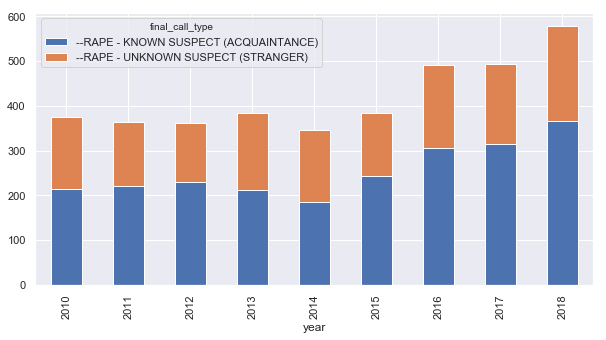

In [39]:
# Stacked bar chart showing all reported rapes by year

stage_is_rape_cfs.groupby('final_call_type').year.value_counts().unstack(0).plot.bar(stacked=True, figsize=(10,5))


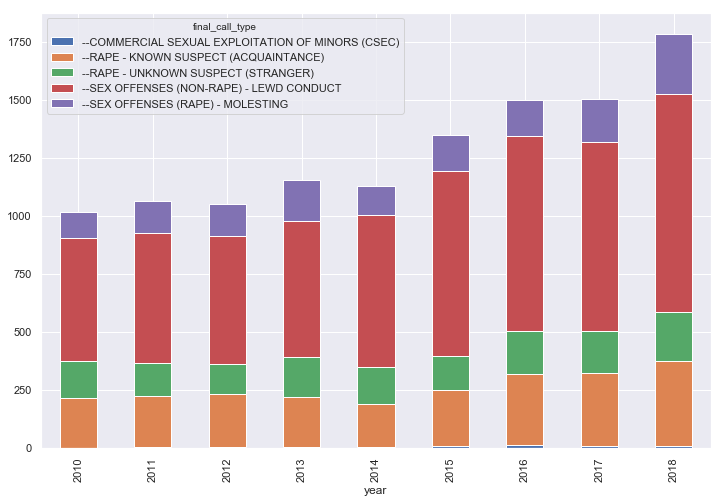

In [40]:
# Stacked bar chart showing all sex crimes by month/year

stage_is_sexual_assault.groupby('final_call_type').year.value_counts().unstack(0).plot.bar(stacked=True, figsize=(12,8))
#stage_is_sexual_assault.groupby('final_call_type').month.value_counts().unstack(0).plot.bar(stacked=True, figsize=(12,8))


## Explore geography of call data

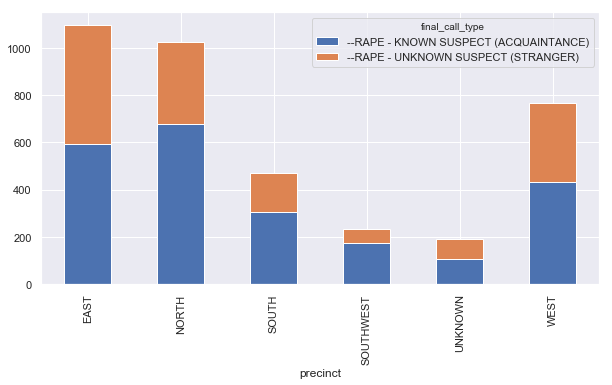

In [41]:
# Plot all rapes by precinct - total 2010-2018
# Add line graph overlay of population that lives in each of these precinct. Unsure of unit of measurement for this
stage_is_rape_cfs.groupby('final_call_type').precinct.value_counts().unstack(0).plot.bar(stacked=True, figsize=(10,5))


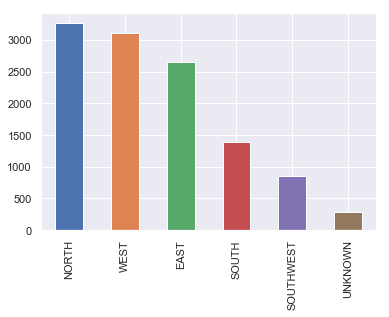

In [42]:
# Plot all sexual assaults by precinct - total 2010-2018

pd.value_counts(stage_is_sexual_assault.precinct).plot.bar()


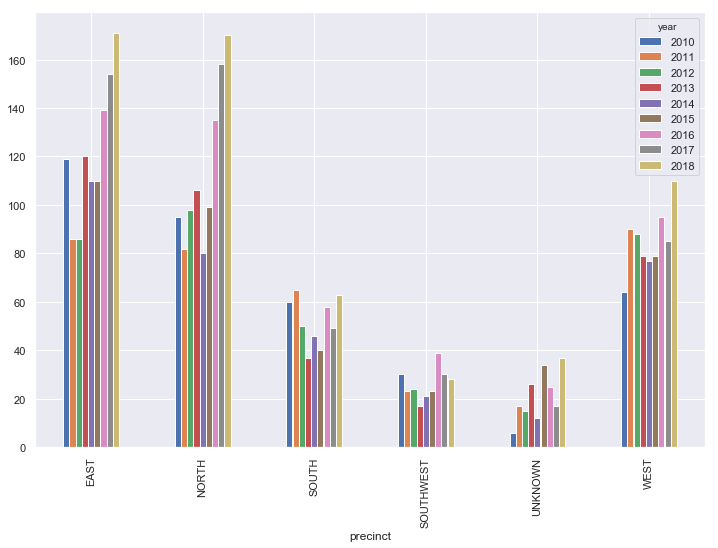

In [53]:
# Plot all reported rapes for each precinct - by year

stage_is_rape_cfs.groupby('year').precinct.value_counts().unstack(0).plot.bar(stacked=False, figsize=(12,8))


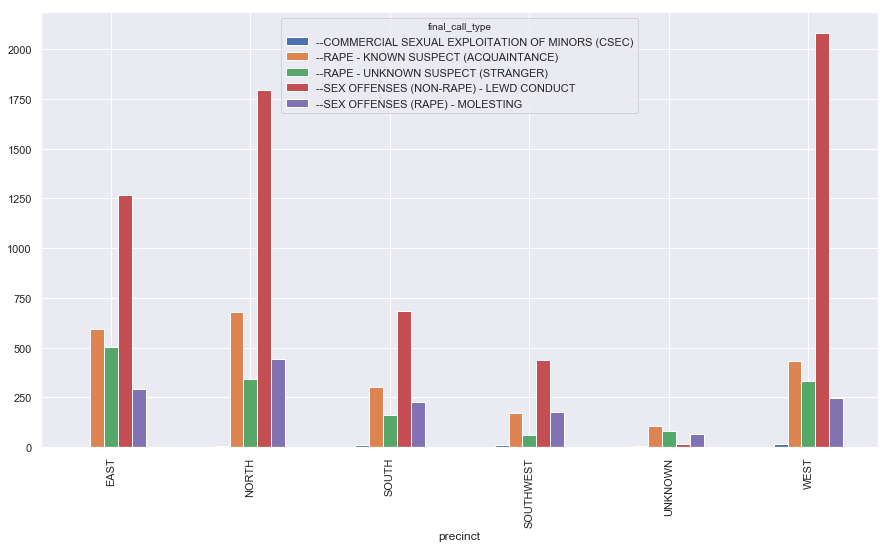

In [43]:
# Plot all sexual assaults by precinct - total 2010-2018

stage_is_sexual_assault.groupby('final_call_type').precinct.value_counts().unstack(0).plot.bar(stacked=False, figsize=(15,8))


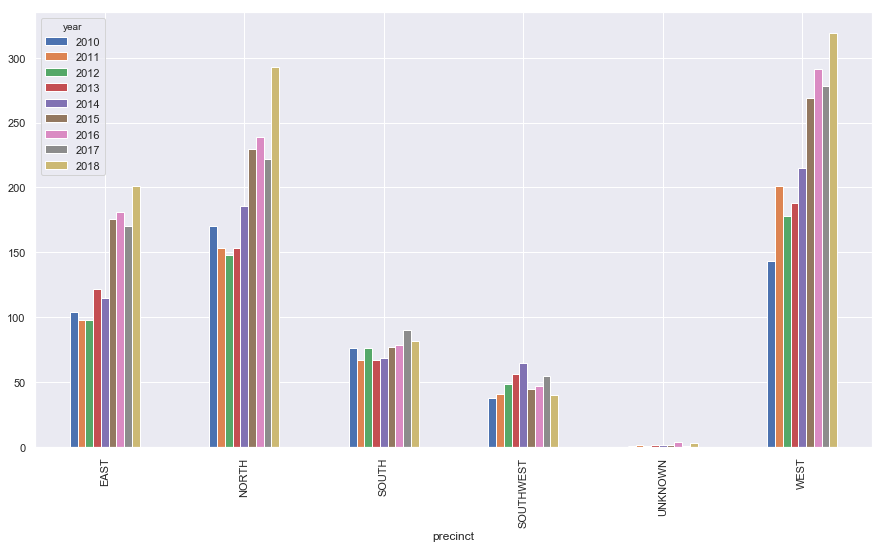

In [44]:
# Plot lewd conduct by precinct - by year

stage_is_lewd_conduct.groupby('year').precinct.value_counts().unstack(0).plot.bar(stacked=False, figsize=(15,8))


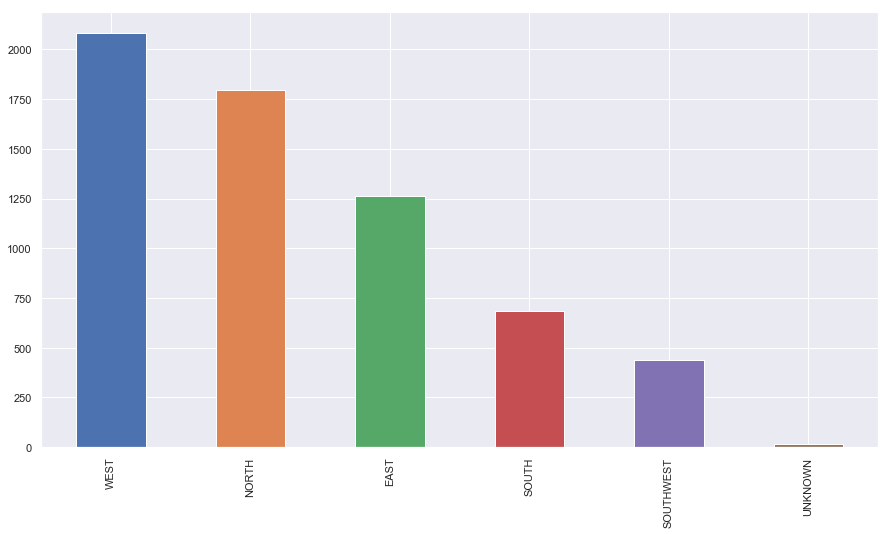

In [45]:
# Plot lewd conduct by precinct - total 2010-2018

pd.value_counts(stage_is_lewd_conduct.precinct).plot.bar(figsize=(15,8))


### Explore call resolutions for rapes vs other violent crimes

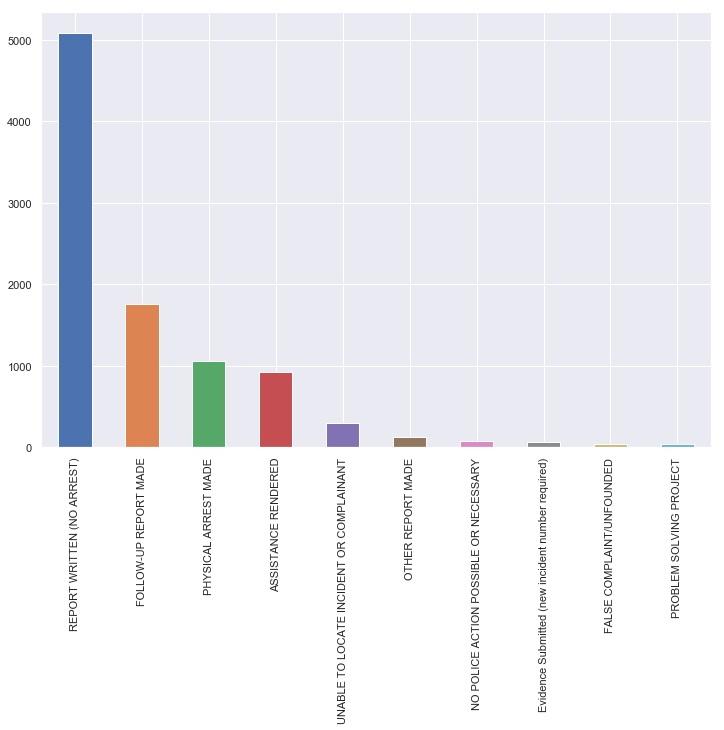

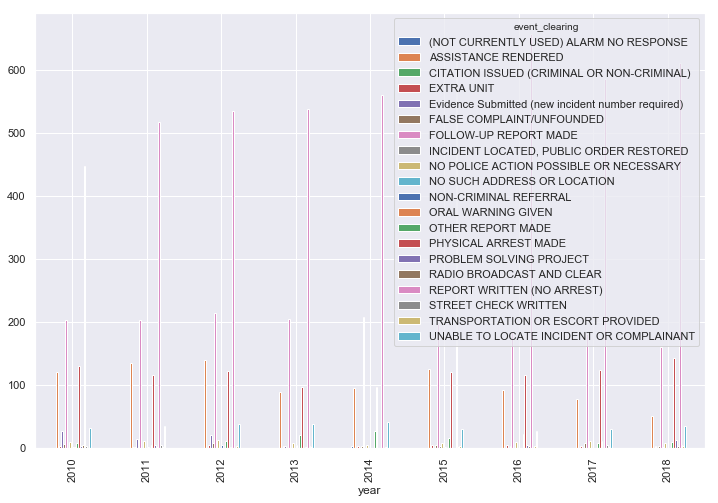

In [46]:
# Chart resolutions for rapes vs all other violent crimes, for all years

# All violent crime calls' resolution, years 2010-2018
pd.value_counts(stage_is_violent_crime.event_clearing).head(10).plot.bar(stacked=True,figsize=(12,8))

# All violent crime calls' resolution, grouped by year
stage_is_violent_crime.groupby('event_clearing').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(12,8))
#stage_is_violent_crime.groupby('event_clearing').year.value_counts()[:35].unstack(0).plot.bar(stacked=False, figsize=(12,8))

#pd.value_counts(stage_is_violent_crime.event_clearing).reindex(['PHYSICAL ARREST MADE', 'ASSISTANCE RENDERED']).year.value_counts().unstack(0).plot.bar()


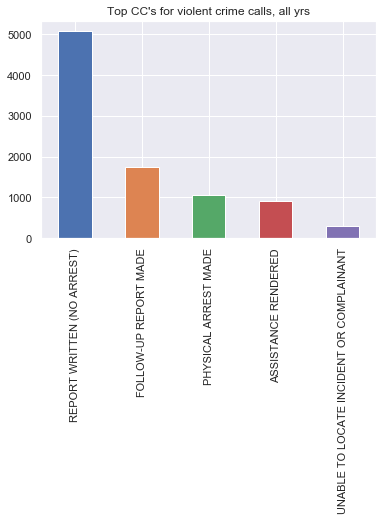

In [47]:
# Chart resolutions for rapes & violent crime - all years combined

# Show count of top 5 clearing codes for all rapes - all years combines
pd.value_counts(stage_is_rape_cfs.event_clearing).head(5).plot.bar(stacked=True, title="Top CC's for rape calls, all yrs")

# Show count of top 5 clearing codes for all violent crimes - all years combines
pd.value_counts(stage_is_violent_crime.event_clearing).head(5).plot.bar(stacked=True, title="Top CC's for violent crime calls, all yrs")



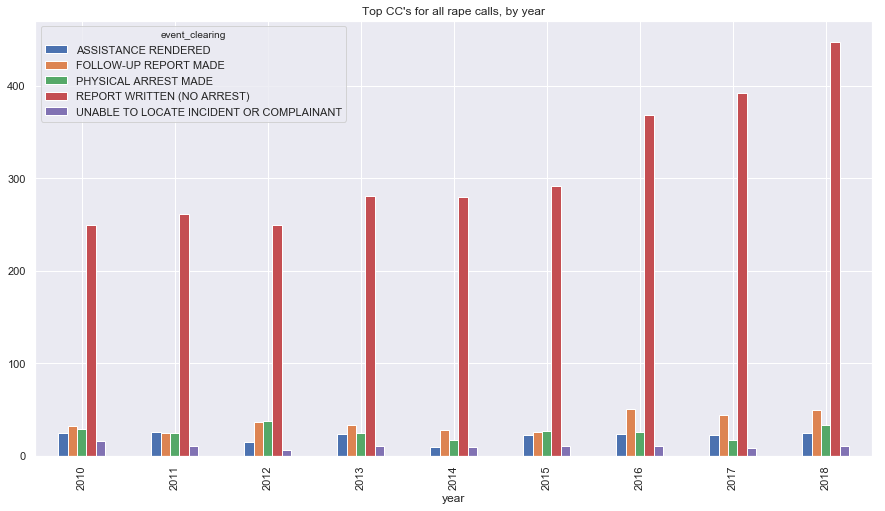

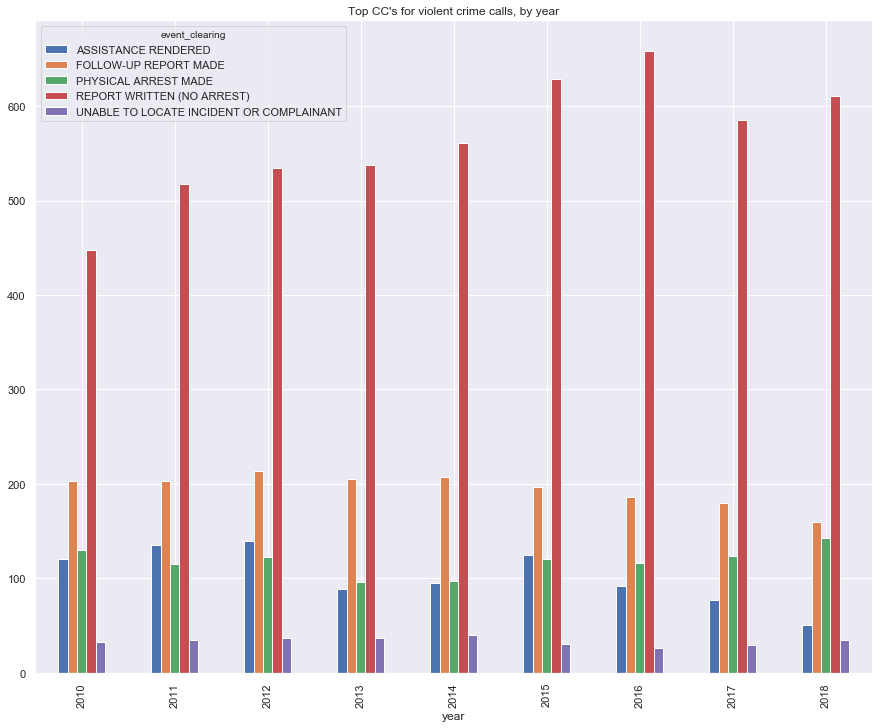

In [48]:
#Show count of top 5 clearing codes for all rapes, by each year
stage_top_cc_rape.groupby('event_clearing').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(15,8), title="Top CC's for all rape calls, by year")

#Show count of top 5 clearing codes for all violent crimes, by each year
stage_top_cc_violent_crimes.groupby('event_clearing').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(15,12), title="Top CC's for violent crime calls, by year")

In [49]:
stage_is_rape_cfs.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month
CAD Event Number,,,,,,,,,,,,,
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680.0,2010,1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389.0,2010,1
2010000000876,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-01-01 17:28:02,2010-01-01 17:28:02,EAST,GEORGE,G1,0.0,2010,1
2010000001744,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-01-02 15:52:18,2010-01-02 16:41:47,WEST,DAVID,D1,2969.0,2010,1
2010000002783,REPORT WRITTEN (NO ARREST),ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-03 13:51:28,2010-01-03 13:51:28,SOUTH,SAM,S3,0.0,2010,1



### Explore % of arrests v. reports written - all rapes v. violent crimes

In [50]:
# Create df for calculating percentages

stage_is_rape_cfs.count()

# percentage_df = pd.DataFrame()
# delete??



event_clearing          3777
call_type               3777
priority                3777
initial_call_type       3777
final_call_type         3777
original_time_queued    3777
arrived_time            3777
precinct                3777
sector                  3588
beat                    3777
time_delta              3777
year                    3777
month                   3777
dtype: int64

In [68]:
# Show % of rape calls that are arrests vs reports written

# Model: df.groupby('A').size() * 100 / len(df)

# below only doing count
# pd.value_counts(stage_is_rape_cfs.event_clearing).head(3).plot.bar(title="tbd")
#rape_arrest = stage_is_rape_cfs.event_clearing.str.contains("PHYSICAL ARREST MADE")


# Calculate percentage of rape calls that result in arrest
rape_arrest_percentage = stage_is_rape_arrest.groupby("event_clearing").size() * 100 / len(stage_is_rape_cfs.event_clearing)


# Calculate percentage of rape calls that result in report written
rape_report_percentage = stage_is_rape_report.groupby("event_clearing").size() * 100 / len(stage_is_rape_cfs.event_clearing)

#sns.barplot(x='event_clearing', y='year', data=stage_is_rape_cfs, estimator=lambda x: sum(x==0)*100.0/len(x))


# Show % of violent crime calls that are arrests vs reports written

# Calculate percentage of violent crime calls that result in report written
violent_crime_report_percentage = stage_is_violent_crime_report.groupby("event_clearing").size() * 100 / len(stage_is_violent_crime.event_clearing)

# Calculate percentage of violent crime calls that result in arrest
violent_crime_arrest_percentage = stage_is_violent_crime_arrest.groupby("event_clearing").size() * 100 / len(stage_is_violent_crime.event_clearing)





In [69]:
rape_report_percentage

event_clearing
FOLLOW-UP REPORT MADE          8.551761
OTHER REPORT MADE              0.529521
REPORT WRITTEN (NO ARREST)    74.688907
dtype: float64

In [60]:
rape_arrest_percentage

event_clearing
PHYSICAL ARREST MADE    6.248345
dtype: float64

In [65]:
violent_crime_report_percentage

event_clearing
FOLLOW-UP REPORT MADE         18.386590
OTHER REPORT MADE              1.267679
REPORT WRITTEN (NO ARREST)    53.253012
dtype: float64

In [66]:
violent_crime_arrest_percentage

event_clearing
PHYSICAL ARREST MADE    11.136721
dtype: float64

In [66]:

# Viz: line chart or column chart or stacked area chart (final) of % arrests rape vs violent crimes - over the 9 years
# Viz: line chart or column chart or stacked area chart (final) of % report written rape vs violent crimes - - over the 9 years



In [ ]:
# Compare CC's for rape calls and violent crime calls
